In [7]:
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import numpy as np

In [8]:
pathin = "/cluster/CMM/home/xfliu/workspace/JMIV_counting_cells/data/CellPose_selected_05_06_2024_onlyRed/train/"

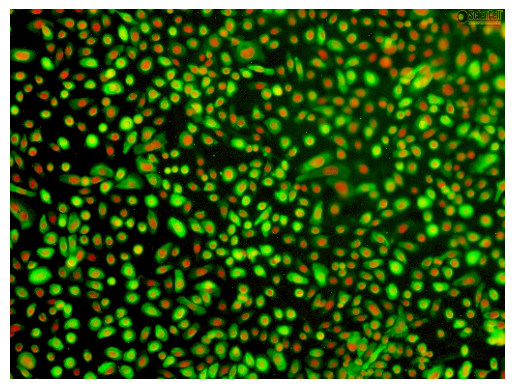

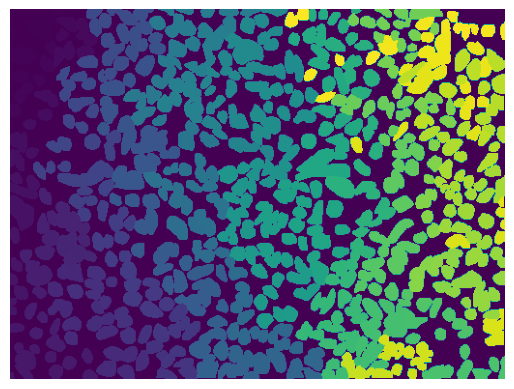

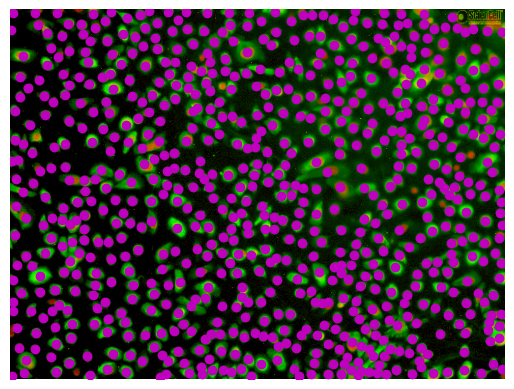

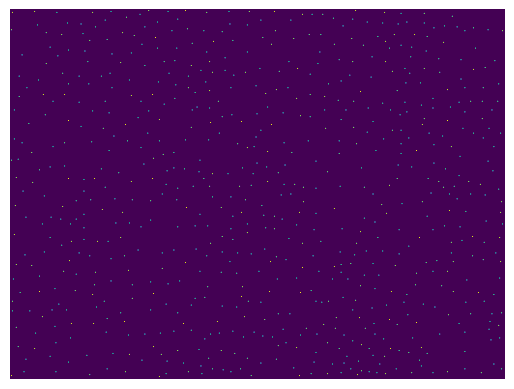

In [28]:

idx="243"
I=plt.imread(pathin+str(idx)+'_img.png')
plt.imshow(I)
plt.axis('off')
plt.show()

M=plt.imread(pathin+str(idx)+'_masks.png')
plt.imshow(M)
plt.axis('off')
plt.show()


Mtemp=(M/np.max(M))*2048.
Mtemp=Mtemp.astype(np.uint32)
regions = regionprops(Mtemp)

plt.imshow(I)

C=np.zeros((I.shape[0],I.shape[1]))
plt.axis('off')
for props in regions:
    y0, x0 = props.centroid
    plt.plot(x0,y0,'mo')
    C[int(y0),int(x0)]=1
plt.show()

plt.imshow(C)
plt.axis('off')
plt.show()


In [29]:
len(regions)

721

In [30]:
np.sum(C)

721.0

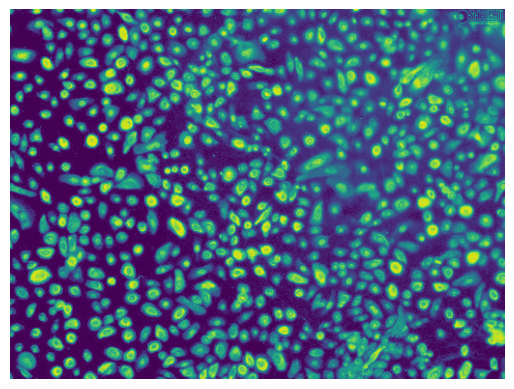

In [31]:
Green_channel_coeff = 0.2
I=plt.imread(pathin+str(idx)+'_img.png')
I_converted = np.max(I, axis = -1) #I[:,:,1]*Green_channel_coeff + I[:,:,0]*(1-Green_channel_coeff)
plt.imshow(I_converted)
plt.axis('off')
plt.show()


In [32]:
I.max()

1.0

In [33]:
I[:,:,0]

array([[0.54901963, 0.4745098 , 0.12156863, ..., 0.02352941, 0.01960784,
        0.00392157],
       [0.627451  , 0.50980395, 0.20784314, ..., 0.4509804 , 0.01960784,
        0.00392157],
       [0.7019608 , 0.58431375, 0.22352941, ..., 0.3764706 , 0.01960784,
        0.01176471],
       ...,
       [0.26666668, 0.19215687, 0.05882353, ..., 0.53333336, 0.64705884,
        0.6509804 ],
       [0.28627452, 0.14509805, 0.11372549, ..., 0.4392157 , 0.5803922 ,
        0.60784316],
       [0.25882354, 0.05098039, 0.05882353, ..., 0.3529412 , 0.5568628 ,
        0.5529412 ]], dtype=float32)

In [34]:
I.shape

(383, 512, 3)

# Generate preprocessed CellPose dataset

In [35]:
# convert RGB to gray (combine Red and Green channels), resize 256,256
# convert mask, resize 256,256

In [9]:
import os
import glob
import cv2

In [10]:
path = "/cluster/CMM/home/xfliu/workspace/JMIV_counting_cells/data/CellPose_selected_05_06_2024_onlyRed"

In [11]:
save_path = "/cluster/CMM/home/xfliu/workspace/JMIV_counting_cells/data/CellPose_converted_05_06_2024_onlyRed_max3channels_bugfixUint8_less200"
for mode_ in ["train", "test"]:
    if not os.path.exists(save_path + "/" + mode_):
        os.makedirs(save_path + "/" + mode_)

In [12]:
Green_channel_coeff = 0.2

In [17]:
for mode in ["train", "test"]:
    images_masks_path_list = glob.glob(path + "/" + "{}/".format(mode) + "*_img.png")

    I_converted_max_list = []
    for impath in images_masks_path_list:
        imname = impath.split("/")[-1].split(".png")[0]
        maskname = imname.replace("img", "masks")
        I=plt.imread(impath)
        I_converted = np.max(I, axis = -1) #I[:,:,1]*Green_channel_coeff + I[:,:,0]*(1-Green_channel_coeff)
        I_converted_uint8 = np.array(I_converted*255., dtype=np.uint8)
        
        I_RGB = np.array(I*255., dtype=np.uint8)
        I_RGB = cv2.cvtColor(I_RGB, cv2.COLOR_BGR2RGB)
        #print("I_converted.max() = {}".format(I_converted.max()))
        #I_converted_max_list.append(I_converted.max())
        

        mask_path = impath.replace("img", "masks")

        M=plt.imread(mask_path)

        """
        Mtemp=(M/np.max(M))*255.
        Mtemp=Mtemp.astype(np.uint8)
        regions = regionprops(Mtemp)
        """

        Mtemp=(M/np.max(M))*2048.
        Mtemp=Mtemp.astype(np.uint32)
        regions = regionprops(Mtemp)

        if len(regions) <= 200:
            C=np.zeros((I.shape[0],I.shape[1]))
            for props in regions:
                y0, x0 = props.centroid
                C[int(y0),int(x0)]=255
            
            #cv2.imwrite(save_path + "/" + mode + '/{}_RGB.png'.format(imname), I_RGB)
            cv2.imwrite(save_path + "/" + mode + '/{}_converted.png'.format(imname), I_converted_uint8)
            cv2.imwrite(save_path + "/" + mode + '/{}_converted.png'.format(maskname), C)
        else:
            print("{} with cell number > 200, eliminated".format(imname))

        # resize image
        #resized = cv2.resize(I_converted, (256,256), interpolation = cv2.INTER_AREA)

144_img with cell number > 200, eliminated
145_img with cell number > 200, eliminated
154_img with cell number > 200, eliminated
225_img with cell number > 200, eliminated
226_img with cell number > 200, eliminated
243_img with cell number > 200, eliminated
244_img with cell number > 200, eliminated
261_img with cell number > 200, eliminated
574_img with cell number > 200, eliminated


In [15]:
I.max()

1.0

In [21]:
#plt.imshow(resized)

In [22]:
#I_converted.max()

In [23]:
import json

In [24]:
json_path = "/cluster/CMM/home/xfliu/workspace/JMIV_counting_cells/best_h_dataset255_CellPose_converted_05_06_2024_onlyRed_max3channels/best_h/best_h_opening_closing_test.json"
f = open(json_path) 
data = json.load(f) 
best_h_list_train = [int(i) for i in data.values()]

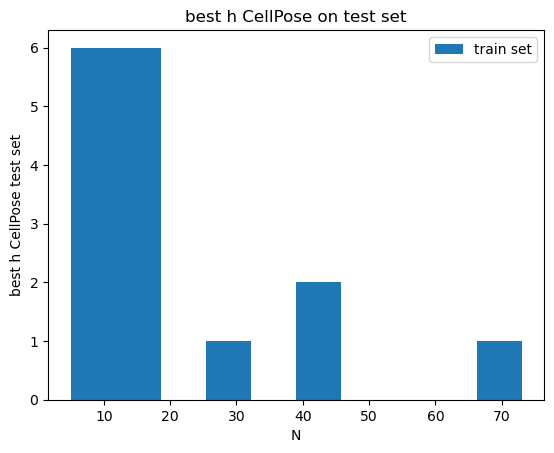

In [25]:
plt.hist(best_h_list_train, label="train set")
plt.title("best h CellPose on test set")
plt.ylabel("best h CellPose test set")
plt.xlabel("N")
plt.legend()